# SelectKBest -

Feature - Cat, Target - Cat ==> Chi-Square

Feature - Numeric, Target - Numeric ==> Correlation

Feature - Cat, Target - Numeric ==> f_regression

Feature - Numeric, Target - Cat ==> f_classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [3]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [8]:
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressureCube'] = df['BloodPressure']**3
df['BloodPressureSqrt'] = np.sqrt(df['BloodPressure'])

In [9]:
df['GlucoseSquare'] = np.square(df['Glucose'])
df['GlucoseCube'] = df['Glucose']**3
df['GlucoseSqrt'] = np.sqrt(df['Glucose'])

In [10]:
df['GlucoseBloodPressure'] = df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseBloodPressure,AgeBMI
0,6,148,72,35,0,33.600,0.627,50,1,5184,373248,8.485,21904,3241792,12.166,10656,1680.000
1,1,85,66,29,0,26.600,0.351,31,0,4356,287496,8.124,7225,614125,9.220,5610,824.600
2,8,183,64,0,0,23.300,0.672,32,1,4096,262144,8.000,33489,6128487,13.528,11712,745.600
3,1,89,66,23,94,28.100,0.167,21,0,4356,287496,8.124,7921,704969,9.434,5874,590.100
4,0,137,40,35,168,43.100,2.288,33,1,1600,64000,6.325,18769,2571353,11.705,5480,1422.300


In [12]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [13]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressureCube',
 'BloodPressureSqrt',
 'GlucoseSquare',
 'GlucoseCube',
 'GlucoseSqrt',
 'GlucoseBloodPressure',
 'AgeBMI']

In [14]:
target = 'Outcome'

<AxesSubplot:>

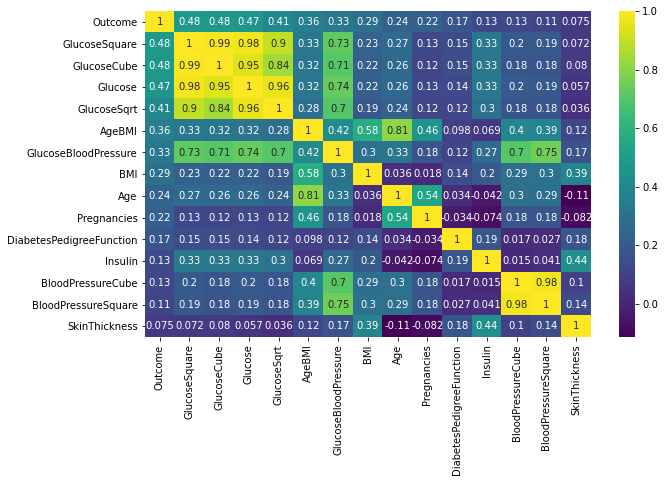

In [15]:
k = 15 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [16]:
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]

In [17]:
X.shape , Y.shape

((768, 16), (768, 1))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [19]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [20]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.7598425196850394
F1 score is:  0.6013071895424835


Actual      0   1
Predicted        
0          39  23
1          15   8


1

# Univariate feature selection

In [21]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
12,GlucoseCube,140493344.594
9,BloodPressureCube,916853.946
11,GlucoseSquare,474020.139
14,GlucoseBloodPressure,77960.489
15,AgeBMI,10527.823
8,BloodPressureSquare,4333.499
4,Insulin,1026.387
1,Glucose,924.909
7,Age,93.008
5,BMI,71.933


In [52]:
select_feature

SelectKBest(k=5, score_func=<function chi2 at 0x00000245F3496430>)

In [22]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [23]:
x_train_chi[0:3]

array([[0.000e+00, 7.056e+03, 5.927e+05, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.240e+04, 5.832e+06, 0.000e+00, 1.775e+03],
       [3.144e+05, 8.836e+03, 8.306e+05, 6.392e+03, 5.460e+02]])

In [24]:
lr_chi_model = clf_lr.fit(x_train_chi,y_train)

In [25]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test)

Accuracy is:  0.7716535433070866
F1 score is:  0.6027397260273972


Actual      0   1
Predicted        
0          41  24
1          13   7


1

In [26]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [27]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Pregnancies,1
1,Glucose,1
4,Insulin,1
5,BMI,1
7,Age,1
10,BloodPressureSqrt,1
13,GlucoseSqrt,1
15,AgeBMI,1
2,BloodPressure,2
14,GlucoseBloodPressure,3


In [28]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [29]:
x_train_rfe[0:3]

array([[2.000e+00, 8.400e+01, 0.000e+00, 0.000e+00, 2.100e+01, 0.000e+00,
        9.165e+00, 0.000e+00],
       [1.000e+00, 1.800e+02, 0.000e+00, 4.330e+01, 4.100e+01, 0.000e+00,
        1.342e+01, 1.775e+03],
       [2.000e+00, 9.400e+01, 7.600e+01, 2.600e+01, 2.100e+01, 8.246e+00,
        9.695e+00, 5.460e+02]])

In [30]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [31]:
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

Accuracy is:  0.7874015748031497
F1 score is:  0.6538461538461539


Actual      0   1
Predicted        
0          35  23
1          19   8


1

# Recursive feature elimination with cross validation

In [32]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 5
Best features : Index(['Pregnancies', 'Glucose', 'BMI', 'BloodPressureSqrt', 'GlucoseSqrt'], dtype='object')


In [33]:
rfecv.grid_scores_

array([[0.796, 0.641, 0.748, 0.738, 0.745],
       [0.786, 0.718, 0.738, 0.738, 0.725],
       [0.786, 0.709, 0.738, 0.748, 0.765],
       [0.825, 0.728, 0.738, 0.767, 0.765],
       [0.835, 0.718, 0.777, 0.767, 0.765],
       [0.816, 0.718, 0.767, 0.786, 0.765],
       [0.835, 0.718, 0.767, 0.757, 0.765],
       [0.835, 0.709, 0.777, 0.767, 0.765],
       [0.845, 0.709, 0.767, 0.767, 0.765],
       [0.845, 0.718, 0.728, 0.748, 0.784],
       [0.845, 0.709, 0.786, 0.748, 0.765],
       [0.825, 0.709, 0.786, 0.748, 0.775],
       [0.816, 0.718, 0.767, 0.748, 0.765],
       [0.806, 0.709, 0.767, 0.748, 0.706],
       [0.835, 0.738, 0.748, 0.738, 0.706],
       [0.835, 0.748, 0.748, 0.738, 0.735]])

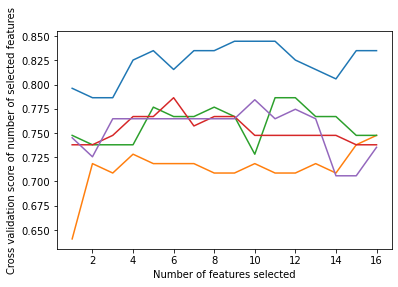

In [34]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [35]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [36]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [37]:
generate_accuracy_and_heatmap(lr_rfecv_model, x_test_rfecv, y_test)

Accuracy is:  0.7755905511811023
F1 score is:  0.6415094339622641


Actual      0   1
Predicted        
0          36  24
1          18   7


1

In [38]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


In [53]:
X_new[0]

array([ 1.,  0., 15.,  2.,  0., 11., 12.,  0.,  8.,  5.,  8.,  4., 11.,
        0.,  1.,  7.,  0.,  6.,  0.,  0.])